# Introduction of the capstone project

1. Project Name: Machine Predictive Maintenance Classification
2. Deliverable: Executable Model Scipt
3. Machine Learning Task: Classification
3. Target Variable: Target - 0 (No Failure) & 1 (Failure)
4. Input Features: See Data Dictionary
6. Win Condition: N/A (Best Possible Model)

In Summary:

This topic of the project is predict the machine failure by the the list of machine technical information. The dataset is download from the kaggle link, the url is inside the "data dictionary.pdf". The most important thing is identify potential machine going to breakdown so user can arrange necessary the preventive maintenance before breakdown.

## 0.0 Library Imports

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

## Pickle for saving model files
import pickle

## Import Logistic Regression
from sklearn.linear_model import LogisticRegression

## Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## Function for splitting training and test set
from sklearn.model_selection import train_test_split

## Function for creating model pipelines
from sklearn.pipeline import make_pipeline

## StandardScaler
from sklearn.preprocessing import StandardScaler

## GridSearchCV
from sklearn.model_selection import GridSearchCV

## Classification metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

## 1.0 Exploratory Analysis

### 1.1 Basic Informations

In [2]:
df = pd.read_csv("predictive_maintenance.csv")

In [3]:
df.shape

(10000, 10)

In [4]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [5]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

**No null value in the datasets**

### 1.2 Distributions of Numeric Features

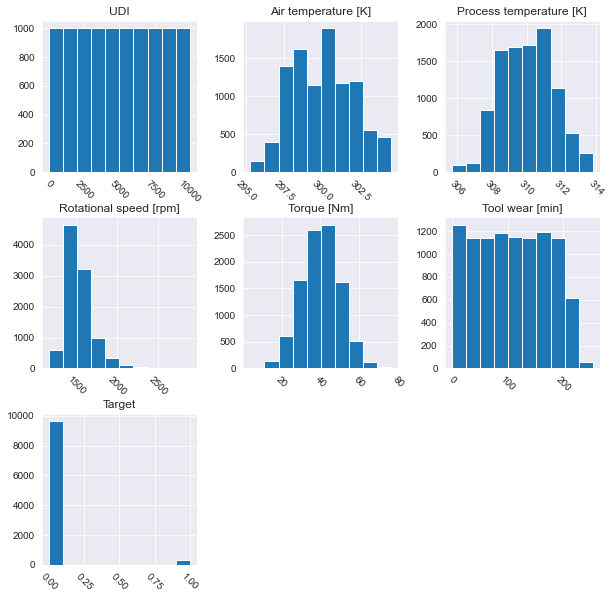

In [7]:
df.hist(figsize=(10,10), xrot=-45)

plt.show()

In [8]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


**Check & Answer**

1. Do each of the distributions make intuitive sense to you? **Yes**
2. Do you anticapte any issue or sparse data? **No**
3. Are they any surprising distributions you should take a closer look at? **No**
4. Do the summary statistics confirm what you've seen from the charts? **Yes**

**Nothing appears out of ordinary**

### 1.3 Distributions of Categorical Features

In [9]:
df.describe(include=["object"])

,Product ID,Type,Failure Type
count,10000,10000,10000
unique,10000,3,6
top,M14860,L,No Failure
freq,1,6000,9652


In [10]:
df.dtypes[df.dtypes != "object"].drop(["UDI", "Target"])

Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
dtype: object

Product ID can be ignore as each row have their own unique id

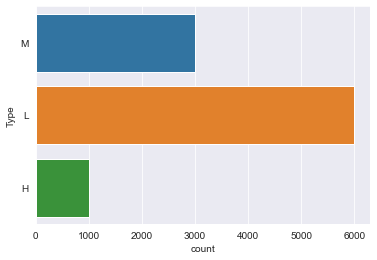

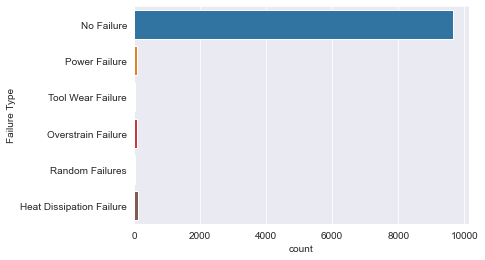

In [11]:
for feature in df.dtypes[df.dtypes == "object"].drop("Product ID").index:
    sns.countplot(y=feature, data=df)
    plt.show()

The target variable of this dataset ("Target") is in numeric format which we should focus on, we can drop the "Failure Type" in the data cleaning stage

**Check & Answer**

1. Are there any classess that might be sparse? **No**
2. Are there any classess that shouldn't be in dataset based on our project scope? **Yes, we should focus on only one target variable which is "Target" instead of the "Failure Type"**
3. Are there any mislabeled classes? **No**
4. Are the distributions seem intuitive? **Yes**

### 1.4 Segmentations

In [12]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [13]:
## Convert target to categorical for violin plot
df["Target_categorical"] = np.where(df["Target"] == 0, "No Failure", "Failure")

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Target_categorical
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,No Failure


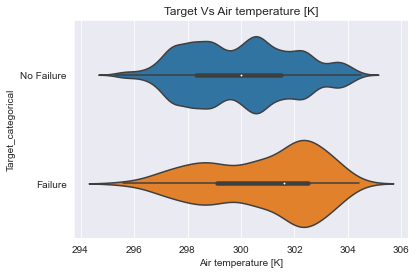

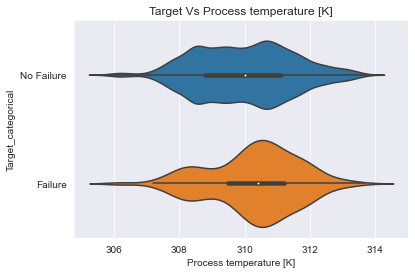

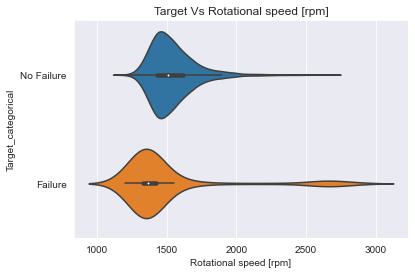

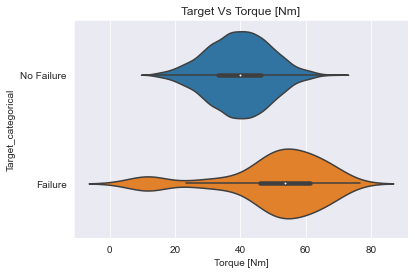

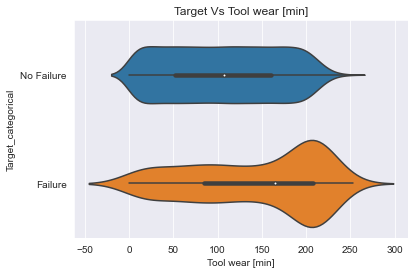

In [14]:
for feature in df.dtypes[df.dtypes != "object"].drop(["UDI", "Target"]).index:
    sns.violinplot(y="Target_categorical", x=feature, data=df)
    plt.title("Target Vs {}".format(feature))
    plt.show()

In [15]:
df.groupby("Target_categorical").mean()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
Target_categorical,,,,,,,
Failure,4647.722714,300.886431,310.290265,1496.486726,50.168142,143.781711,1.0
No Failure,5012.878791,299.973999,309.995570,1540.260014,39.629655,106.693717,0.0


Failure machine tend to have higher value in torque and tool wear according to the violin plot

### 1.5 Correlations

In [16]:
correlations = df.corr()

In [17]:
correlations

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


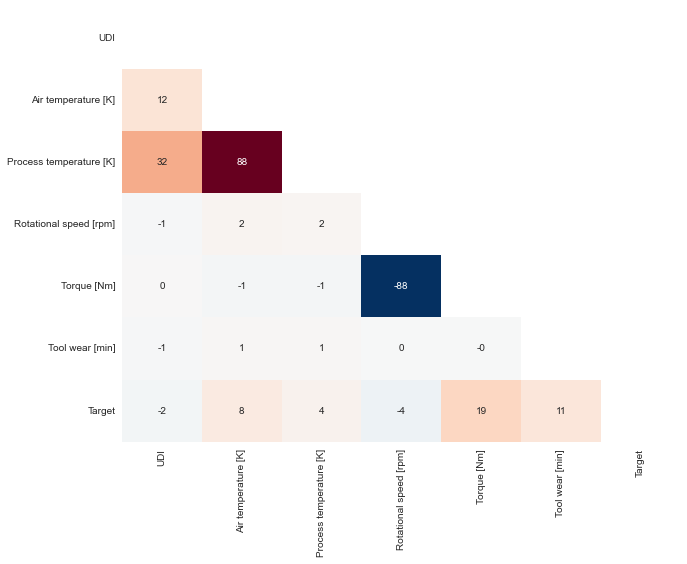

In [18]:
## White background Chart
sns.set_style("whitegrid")

## Generate a mask for the upper triangle
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = 1

plt.figure(figsize=(10,8))

sns.heatmap(correlations * 100, 
            cmap="RdBu_r", 
            annot=True, 
            fmt=".0f", 
            mask=mask,
            cbar=False
           )

plt.show()

* Process temperature and Air Temperature have **strong positive correlation**
* Torque and Rotational speed have **strong negative correlation**

## 2.0 Data Cleaning

In [19]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Target_categorical
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,No Failure


### 2.1 Drop Unwanted Observations

In [20]:
## Before drop duplicates
df.shape

(10000, 11)

In [21]:
## After drop duplicate
df = df.drop_duplicates()

df.shape

(10000, 11)

We can conclude that is no duplicate observations in this dataset

### 2.2 Fix Structural Errors

In [22]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Target_categorical
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,No Failure


In [23]:
### Quick look on any data is poor housekeeping
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
Target_categorical         0
dtype: int64

Thanks God, there is no any null values in the dataset as well.

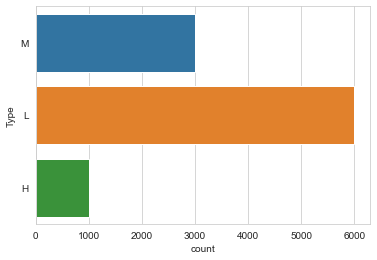

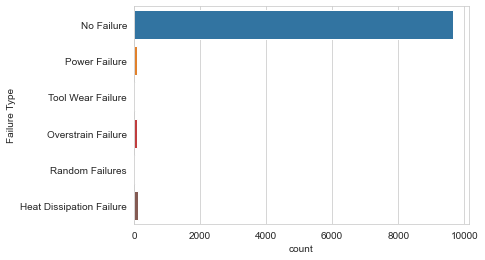

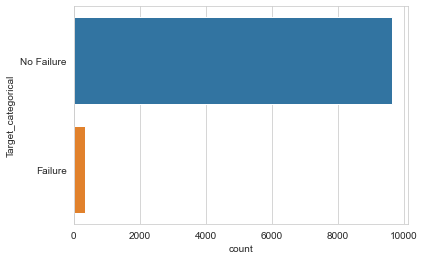

In [24]:
## Quick look on any typos or inconsistent capitalization
for feature in df.dtypes[df.dtypes == "object"].drop("Product ID").index:
    sns.countplot(y=feature, data=df)
    plt.show()

Seem likes there isn't any typos or inconsistent capization in the dataset.

### 2.3 Remove "Guilty Outlier"

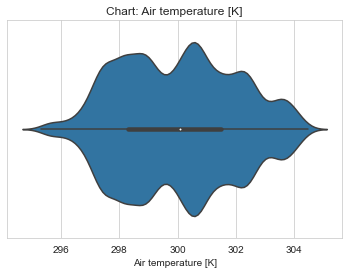

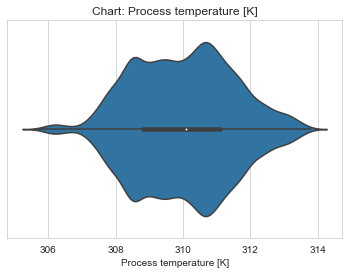

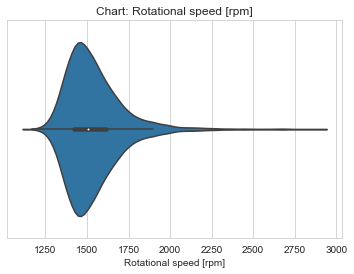

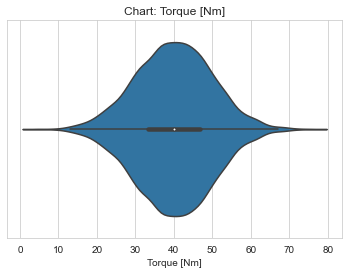

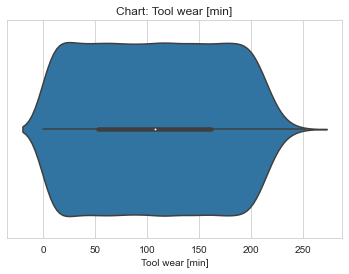

In [25]:
for feature in df.dtypes[df.dtypes != "object"].drop(["UDI", "Target"]).index:
    sns.violinplot(x = feature, data=df)
    plt.title("Chart: {}".format(feature))
    plt.show()

Among those features, it look like there is nothing really stands out as possible outlier.

### 2.4 Handle Missing Data

In [26]:
## Quick look on any missing data in numeric features
df.select_dtypes(exclude=["object"]).isnull().sum()

UDI                        0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
dtype: int64

In [27]:
## Quick look on any missing data in categorical features
df.select_dtypes(include=["object"]).isnull().sum()

Product ID            0
Type                  0
Failure Type          0
Target_categorical    0
dtype: int64

We don't have any missing values for both numerical features and categorical features in this dataset.

## 3.0 Feature Engineering

### 3.1 Leverage Domain Knowledge

In [28]:
## UDI, Product ID, Failure Type and Target_categorical can be removed as they wont have any contribution to this project
new_df = df.copy()
new_df = new_df.drop(["UDI", "Product ID", "Failure Type", "Target_categorical"], axis=1)

new_df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


### 3.2 Create Interaction Features

In [29]:
## Its is good to have the output power of the machine
new_df["Output Power"] = new_df["Rotational speed [rpm]"] * new_df["Torque [Nm]"]

new_df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Output Power
0,M,298.1,308.6,1551,42.8,0,0,66382.8
1,L,298.2,308.7,1408,46.3,3,0,65190.4
2,L,298.1,308.5,1498,49.4,5,0,74001.2
3,L,298.2,308.6,1433,39.5,7,0,56603.5
4,L,298.2,308.7,1408,40.0,9,0,56320.0


In [30]:
new_df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Output Power
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,59967.147040
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,10193.093881
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,10966.800000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,53105.400000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,59883.900000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,66873.750000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,99980.400000


### 3.3 Group Sparse Classes

There is no sparse classes need to be group

### 3.4 Prepare Analytical Base Table

In [31]:
pd.get_dummies(new_df, columns=["Type"]).head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Output Power,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,66382.8,0,0,1
1,298.2,308.7,1408,46.3,3,0,65190.4,0,1,0
2,298.1,308.5,1498,49.4,5,0,74001.2,0,1,0
3,298.2,308.6,1433,39.5,7,0,56603.5,0,1,0
4,298.2,308.7,1408,40.0,9,0,56320.0,0,1,0


In [32]:
## Save to new ABT dataframe
abt_df = pd.get_dummies(new_df, columns=["Type"])

abt_df.head(10)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Output Power,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,66382.8,0,0,1
1,298.2,308.7,1408,46.3,3,0,65190.4,0,1,0
2,298.1,308.5,1498,49.4,5,0,74001.2,0,1,0
3,298.2,308.6,1433,39.5,7,0,56603.5,0,1,0
4,298.2,308.7,1408,40.0,9,0,56320.0,0,1,0
5,298.1,308.6,1425,41.9,11,0,59707.5,0,0,1
6,298.1,308.6,1558,42.4,14,0,66059.2,0,1,0
7,298.1,308.6,1527,40.2,16,0,61385.4,0,1,0
8,298.3,308.7,1667,28.6,18,0,47676.2,0,0,1
9,298.5,309.0,1741,28.0,21,0,48748.0,0,0,1


## 4.0 Algorithm Selection

We will use three algorithms for this project. Namely:
1. Logistic Regression
2. Random Forest
3. Gradient Boosting

## 5.0 Model Training

### 5.1 Split Your Dataset

In [33]:
## Let's show the ABT df
abt_df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Output Power,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,66382.8,0,0,1
1,298.2,308.7,1408,46.3,3,0,65190.4,0,1,0
2,298.1,308.5,1498,49.4,5,0,74001.2,0,1,0
3,298.2,308.6,1433,39.5,7,0,56603.5,0,1,0
4,298.2,308.7,1408,40.0,9,0,56320.0,0,1,0


In [34]:
## Create separate object for target variable
y = abt_df["Target"]

## Create separate object for input features
X = abt_df.drop("Target", axis=1)

In [35]:
## Split X and y into train and test sets
## Stratified to balance the target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

print(len(X_train), len(X_test), len(y_train), len(y_test))

8000 2000 8000 2000


### 5.2 Build Model Pipelines

1. <code style="color:crimson">'l1'</code> for L1-regularized logistic regression
2. <code style="color:crimson">'l2'</code> for L2-regularized logistic regression
3. <code style="color:crimson">'rf'</code> for random forest
4. <code style="color:crimson">'gb'</code> for gradient boosted tree.

In [ ]:
## Latest update required Logistic Regression function to set solver to the "liblinear" for l1 and l2
## Function below to discover the best solver
## Resource links -> https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)
log_reg = LogisticRegression(C=1, n_jobs=-1, random_state=123)
clf = GridSearchCV(log_reg, params, cv=5)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']

In [37]:
for score, solver in zip(scores, solver_list):
    print(f"  {solver} {score:.3f}" )

  liblinear 0.970
  newton-cg 0.969
  lbfgs 0.970
  sag 0.966
  saga 0.966


In [38]:
pipelines = {
    "l1" : make_pipeline(StandardScaler(), LogisticRegression(penalty="l1", solver="liblinear", random_state=123)),
    "l2" : make_pipeline(StandardScaler(), LogisticRegression(penalty="l2", solver="liblinear", random_state=123)),
    "rf" : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    "gb" : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
}

### 5.3 Declare Hyperparamater Grids

In [39]:
### Use get_params() to find tuneable hyperparameters
pipelines["l1"].get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression',
   LogisticRegression(penalty='l1', random_state=123, solver='liblinear'))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(penalty='l1', random_state=123, solver='liblinear'),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l1',
 'logisticregression__random_state': 123,
 'logisticregression__solver': 'liblinear',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_

In [40]:
## Logistic Regression hyperparameters
l1_hyperparameters = {
    "logisticregression__C" : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
}

l2_hyperparameters = {
    "logisticregression__C" : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
}

## Random Forest hyperparameters
rf_hyperparameters = {
    "randomforestclassifier__n_estimators" : [100, 200],
    "randomforestclassifier__max_features" : ['auto', 'sqrt', 0.33],
    "randomforestclassifier__min_samples_leaf" : [1, 3, 5, 10]
}

## Gradient Boosted Tree hyperparameters
gb_hyperparameters = {
    "gradientboostingclassifier__n_estimators" : [100, 200],
    "gradientboostingclassifier__learning_rate" : [0.05, 0.1, 0.2],
    "gradientboostingclassifier__max_depth" : [1, 3, 5]
}

In [41]:
## Create hyperparameters dictionary
hyperparameters = {
    "l1" : l1_hyperparameters,
    "l2" : l2_hyperparameters,
    "rf" : rf_hyperparameters,
    "gb" : gb_hyperparameters
}

### 5.4 Fit and Tune Models with Cross Validation

In [42]:
## Create empty dictionary for fitted model
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    model.fit(X_train, y_train)
    
    fitted_models[name] = model
    
    print(name, "has been fitted")

l1 has been fitted
l2 has been fitted
rf has been fitted
gb has been fitted


### 5.5 AUROC Review

In [72]:
## To generate the cross validation score
for name, model in fitted_models.items():
    print(name, model.best_score_)

l1 0.9708749999999998
l2 0.970875
rf 0.9855
gb 0.9883749999999999


This is the result of the holdout accurary. However, previous lesson taught us straight accuracy is not always the best way to evaluate a classification model. 

### 5.6 Pick the Winner

This code is from taken Kaggle to easier visualize the Confusion Matrox and Roc Score

**Resources -> [Link]("https://www.kaggle.com/code/ignaciovinuales/dealing-with-class-imbalance-auc-93-f1-94-eda/notebook")**

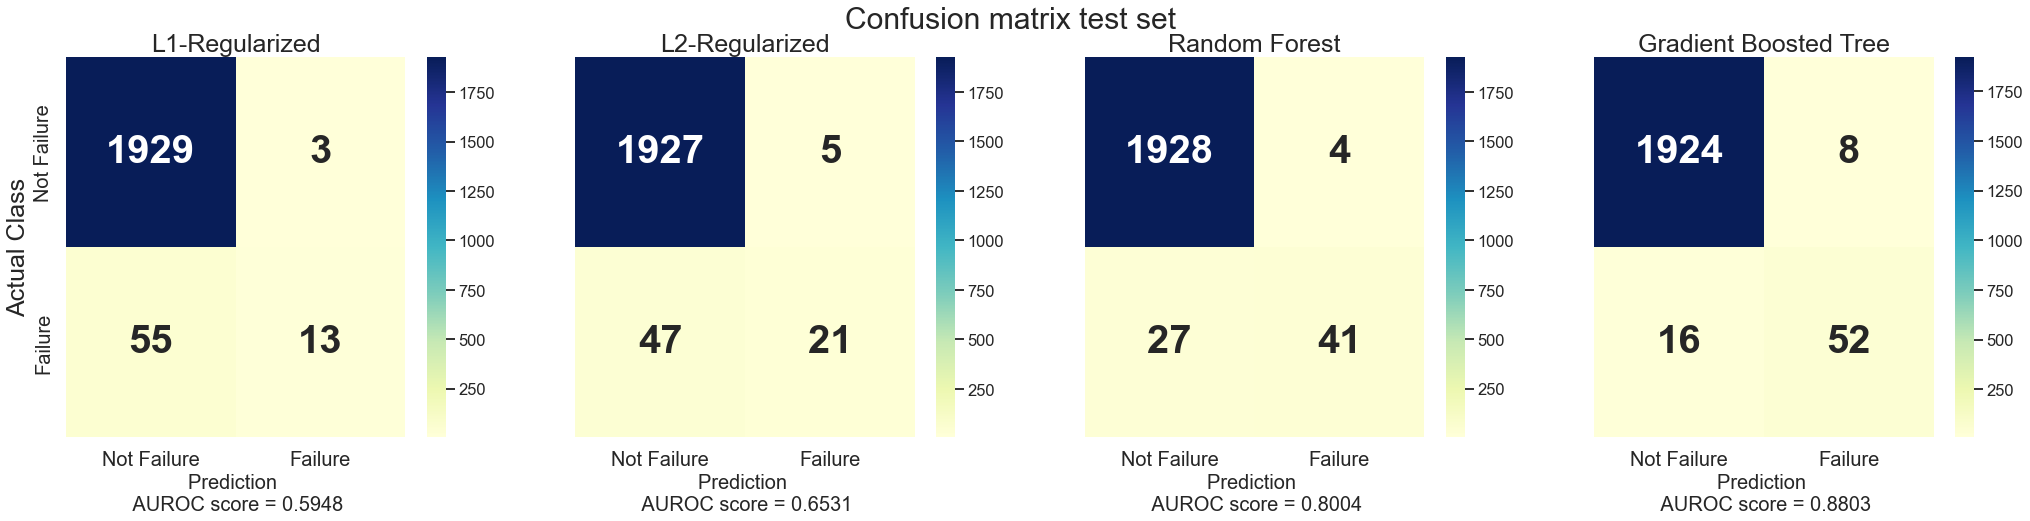

In [71]:
fig, axes = plt.subplots(1, 4, figsize=[35,7])
fig.suptitle('Confusion matrix test set', fontsize=30)
axes.flatten()
j=0

for name, model in fitted_models.items():
    pred = fitted_models[name].predict(X_test)
    
    sns.set_context('talk')
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', annot_kws={"size": 40, "weight": "bold"}, ax=axes[j])

    labels = ['Not Failure', 'Failure']
    axes[j].set_xticklabels(labels, fontsize=20)
    axes[j].set_yticklabels(['',''], fontsize=20)
    axes[j].set_xlabel('Prediction \n AUROC score = ' + str(round(roc_auc_score(y_test, pred),4)), fontsize=20)
    j += 1

    axes[0].set_yticklabels(labels, fontsize=20)
    axes[0].set_ylabel('Actual Class', fontsize=25)
    for index, name in enumerate(["L1-Regularized", "L2-Regularized", "Random Forest", "Gradient Boosted Tree"]):
        axes[index].set_title(name, fontsize=25)
     

**We can easily noticed the Gradient Boosted Tree has the highest cross validation score and AUROC Score**

In [73]:
## Save winning model as final_model.pkl
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

## 6.0 Insights & Analysis

**The winner is Gradient Boosted Tree!**

In summary, we identified the best classification model for this project is **Gradient Boosted Tree** with the __0.988 Cross Validation Score__ and __0.8803 AUROC Score__.

However i'm believed that is lot of feature engineering and hyperparameter to play around to actually increass the accurary of the model. In addition, i will work out on how to deploy this project to the production as i believed the purpose of this project is prepare the counter measure before the machine breakdown (Predictive Maintenace) as the data we are collected mostly the machine failure already happened. 

My next plan will be:
1. Treshold level for the potential failure machine
2. Automate the trigger by python function (Either email or sms) (May need to check on the google mail api)